## Using Entropy as a Proxy for Multi-class Classification Uncertainty
 
**Data** [Sources](2_Data_Sources.ipynb) | [Compositional Data](2_Data_CompositionalData.ipynb) | [Lambdas](2_Data_Lambdas.ipynb) **Classifiers** [Models](3_Classifiers_ClassifierModels.ipynb) | [Dimensionality](3_Classifiers_Dimensionality.ipynb) | [Performance](3_Classifiers_Performance.ipynb) **Visualisation**  [Entropy](4_Vis_Entropy.ipynb) | [Manifolds](4_Vis_Manifolds.ipynb) **Workflows** [Building Workflows](5_BuildingWorkflows.ipynb) **pyrolite** [Overview](6_pyrolite.ipynb) **GitHub** [AEGC2019](https://github.com/morganjwilliams/aegc2019) | [pyrolite](https://github.com/morganjwilliams/pyrolite)

While some classification problems can be adapted to versions of binary classifications, most involve multiple classes.

In the case of probabilistic classification, model outputs are typically a multidimensional array of multiclass probability estimates, where the relative uncertainty of classification is more difficult to ascertain, and harder again to visualise for a larger group of samples.

One measure which is related to the uncertainty of classification is the [information entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory)), which effectively measures the distribution of probability among a number of potential classes:

\\[S = - \sum{P_i \cdot log(P_i)} \\]

Where samples are predicted to belong to one of mutliple classes with high relative probability, entropy is low. Where a sample is predicted to belong to mutliple classes with more or less equal probability, entropy is high. This is a particularly useful measure for quick visualisations of classification outputs (also used here in the [Manifolds notebook](../notebooks/Vis/Manifolds.ipynb)), where the entropy is rescaled to \\([0,1]\\) to give a relative opacity.

In [1]:
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
from pyrolite.util.skl.pipeline import SVC_pipeline
from pyrolite.util.skl.vis import alphas_from_multiclass_prob
from pyrolite.util.plot import __DEFAULT_DISC_COLORMAP__

np.random.seed(82)

Using TensorFlow backend.


In [2]:
wine = sklearn.datasets.load_wine()
data, target = wine["data"], wine["target"]

In [3]:
svc = SVC_pipeline(probability=True)
gs = svc.fit(data, target)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    1.9s remaining:    1.9s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    1.9s remaining:    0.8s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.9s finished


In [4]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(data, target)
f0, f1 = np.argsort(clf.feature_importances_)[::-1][:2]

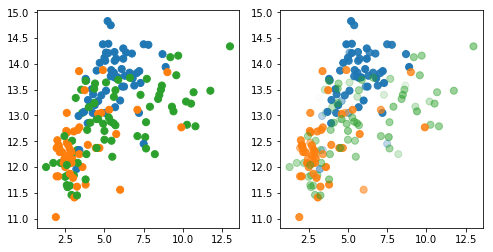

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
x, y = data[:, f0],data[:, f1],

classes = gs.predict(data)
c = __DEFAULT_DISC_COLORMAP__(classes)

ax[0].scatter(x, y, c=c, s=50)

c[:, -1] = alphas_from_multiclass_prob(gs.predict_proba(data), method='entropy')
ax[1].scatter(x, y, c=c, s=50);

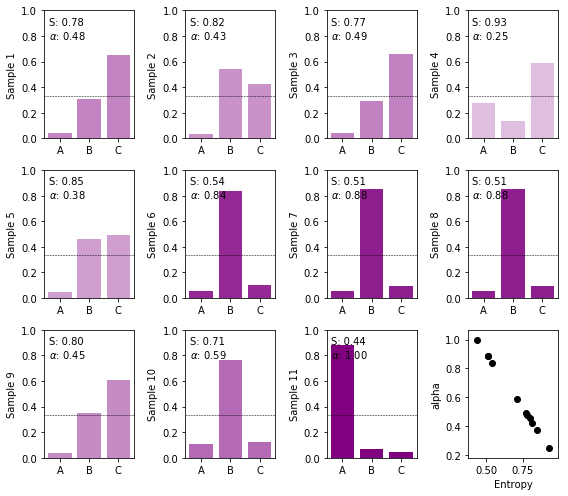

In [97]:
from scipy.stats import entropy
from pyrolite.util.plot import share_axes
fig, ax = plt.subplots(3, 4, figsize=(8,7))
ax=ax.flat
share_axes(ax[:-1], which='xy')

cm = plt.cm.Greens

ax[0].set_ylim(0, 1)
n = 11
dt = gs.predict_proba(data)[::-12][:n]
dtalpha = alphas_from_multiclass_prob(dt, method='entropy')
for ix in range(n):
    ax[ix].axhline(1/3, color='k', ls='--', lw=0.5)
    ax[ix].bar(['A', 'B', 'C'], dt[ix], alpha=dtalpha[ix], facecolor='purple')
    ax[ix].set_ylabel('Sample {}'.format(ix+1))
    ax[ix].annotate("S: {:.2f}".format(entropy(dt[ix]))+"\n"+r"$\alpha$: {:.2f}".format(dtalpha[ix]), 
                    xy=(0.05, 0.95), 
                    xycoords='axes fraction',
                    ha='left', 
                    va='top')

ax[-1].scatter([entropy(dt[ix]) for ix in range(n)], [dtalpha[ix]for ix in range(n)], color='k')
ax[-1].set_xlabel('Entropy')
ax[-1].set_ylabel('alpha')
plt.tight_layout()

In [ ]:
from pyrolite.util.plot import save_figure
save_figure(fig,
            save_at="../presentation/figures/", 
            name='EntropyVis', 
            save_fmts=['pdf', 'png'])